In [82]:
import matplotlib.pyplot as plt

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 14

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [92]:
import pandas as pd
import csv
import numpy as np
import math
#1 middleware, 1 server
file1_1 = pd.read_csv("/home/anastasiia/asl-project-2019-ruzhanskaia/report_src/part3_cl_TR_value_file.txt", header=None, delimiter=' ')
#1 middleware, 3 servers
file3_1 = pd.read_csv("/home/anastasiia/asl-project-2019-ruzhanskaia/report_src/part4_cl_TR_value_file.txt", header=None, delimiter=' ')
#2 middlewares, 1 server
file1_2 = pd.read_csv("/home/anastasiia/asl-project-2019-ruzhanskaia/report_src/part5_cl_TR_value_file.txt", header=None, delimiter=' ')
#2 middlewares, 3 servers
file3_2 = pd.read_csv("/home/anastasiia/asl-project-2019-ruzhanskaia/report_src/part6_cl_TR_value_file.txt", header=None, delimiter=' ')


for i in [0, 1, 2]:
    file1_1[i] = file1_1[i].astype(int)
    file3_1[i] = file3_1[i].astype(int)
    file1_2[i] = file1_2[i].astype(int)
    file3_2[i] = file3_2[i].astype(int)
    
for i in [3, 4, 5, 6]:
    file1_1[i] = file1_1[i].astype(float)
    file3_1[i] = file3_1[i].astype(float)
    file1_2[i] = file1_2[i].astype(float)
    file3_2[i] = file3_2[i].astype(float)
    
for i in [4, 5, 6]:
    file1_1[i] = np.log10(file1_1[i])
    file3_1[i] = np.log10(file3_1[i])
    file1_2[i] = np.log10(file1_2[i])
    file3_2[i] = np.log10(file3_2[i])

file1_1[7] = file1_1[[4, 5, 6]].mean(axis = 1)
file3_1[7] = file3_1[[4, 5, 6]].mean(axis = 1)
file1_2[7] = file1_2[[4, 5, 6]].mean(axis = 1)
file3_2[7] = file3_2[[4, 5, 6]].mean(axis = 1)

#file1_1 - 1 middleware, 1 server    -1 -1
#file3_1 = 1 middleware, 3 servers   -1  1
#file1_2 = 2 middlewares, 1 server    1 -1
#file3_2 = 2 middlewares, 3 servers   1  1
#w 8 = -1
#w 32 = 1

# -1 -1 -1
str1 = file1_1[(file1_1[2] == 32) &
                 (file1_1[1] == 256) & 
                 (file1_1[0] == 8)]
# 1 -1  -1
str2 = file1_2[(file1_1[2] == 32) &
                 (file1_1[1] == 256) & 
                 (file1_1[0] == 8)]

# -1  1 -1
str3 = file3_1[(file1_1[2] == 32) &
                 (file1_1[1] == 256) & 
                 (file1_1[0] == 8)]
# 1  1  -1
str4 = file3_2[(file1_1[2] == 32) &
                 (file1_1[1] == 256) & 
                 (file1_1[0] == 8)]

# -1 -1 1
str5 = file1_1[(file1_1[2] == 32) &
                 (file1_1[1] == 256) & 
                 (file1_1[0] == 32)]
# 1 -1  1
str6 = file1_2[(file1_1[2] == 32) &
                 (file1_1[1] == 256) & 
                 (file1_1[0] == 32)]

# -1  1 1
str7 = file3_1[(file1_1[2] == 32) &
                 (file1_1[1] == 256) & 
                 (file1_1[0] == 32)]

# 1 1 1
str8 = file3_2[(file1_1[2] == 32) &
                 (file1_1[1] == 256) & 
                 (file1_1[0] == 32)]



y0 = float(str1[7])
y1 = float(str2[7])
y2 = float(str3[7])
y3 = float(str4[7])
y4 = float(str5[7])
y5 = float(str6[7])
y6 = float(str7[7])
y7 = float(str8[7])

I = [1, 1, 1, 1, 1, 1, 1, 1]
A = [-1, 1, -1, 1, -1, 1, -1, 1]
B = [-1, -1, 1, 1, -1, -1, 1, 1]
C = [-1, -1, -1, -1, 1, 1, 1, 1]
AB = [1, -1, -1, 1, 1, -1, -1, 1]
AC = [1, -1, 1, -1, -1, 1, -1, 1]
BC = [1, 1, -1, -1, -1, -1, 1, 1]
ABC = [-1, 1, 1, -1, 1, -1, -1, 1]
y = [y0, y1, y2, y3, y4, y5, y6, y7]
print(y)
q0 = sum(np.multiply(y, I)) / 8
qA = sum(np.multiply(y, A)) / 8
qB = sum(np.multiply(y, B)) / 8
qC = sum(np.multiply(y, C)) / 8
qAB = sum(np.multiply(y, AB)) / 8
qAC = sum(np.multiply(y, AC)) / 8
qBC = sum(np.multiply(y, BC)) / 8
qABC = sum(np.multiply(y, ABC)) / 8

u0 = pow(10, q0)
uA = pow(10, qA)
uB = pow(10, qB)
uC = pow(10, qC)
uAB = pow(10, qAB)
uAC = pow(10, qAC)
uBC = pow(10, qBC)
uABC = pow(10, qABC)

SSY = 0
for i in [4, 5, 6]:
    SSY += (float(str1[i]) * float(str1[i]) + float(str2[i]) * float(str2[i]) +
            float(str3[i]) * float(str3[i]) + float(str4[i]) * float(str4[i]) +
            float(str5[i]) * float(str5[i]) + float(str6[i]) * float(str6[i]) +
            float(str7[i]) * float(str7[i]) + float(str8[i]) * float(str8[i]))
SSA = 24 * qA * qA
SSB = 24 * qB * qB
SSC = 24 * qC * qC
SSAB = 24 * qAB * qAB
SSAC = 24 * qAC * qAC
SSBC = 24 * qBC * qBC
SSABC = 24 * qABC * qABC
SS0 = 24 * q0 * q0
SST = SSY - SS0
SSE = SST - (SSA + SSB + SSC + SSAB + SSAC + SSBC + SSABC)
print("Percentage middlware=" + str(SSA * 100 / SST))
print("Persentage server=" + str(SSB * 100 / SST))
print("Percentage workers=" + str(SSC * 100 / SST))
print("Percentage middleware+server=" + str(SSAB * 100 / SST))
print("Percentage middleware+workers=" + str(SSAC * 100 / SST))
print("Percentage server+workers=" + str(SSBC * 100 / SST))
print("Percentage of all factors=" + str(SSABC * 100 / SST))
print("Percentage of errors=" + str(SSE * 100 / SST))

print(" 1 middleware, 1 server, 8 workers:\n", float(str1[3]))
print(" 2 middlewares, 1 server, 8 workers:\n", float(str2[3]))
print(" 1 middleware, 3 servers, 8 workers:\n", float(str3[3]))
print(" 2 middlewares, 3 servers: 8 workers:\n", float(str4[3]))
print(" 1 middleware, 1 server, 32 workers:\n", float(str5[3]))
print(" 2 middlewares, 1 server, 32 workers:\n", float(str6[3]))
print(" 1 middleware, 3 servers, 32 workers:\n", float(str7[3]))
print(" 2 middlewares, 3 servers: 32 workers:\n", float(str8[3]))

7    4.061356
Name: 7, dtype: float64 7    4.082999
Name: 4, dtype: float64 7    4.061464
Name: 5, dtype: float64 7    4.039604
Name: 6, dtype: float64
7    4.228385
Name: 7, dtype: float64 7    4.228034
Name: 4, dtype: float64 7    4.232048
Name: 5, dtype: float64 7    4.225073
Name: 6, dtype: float64
7    3.960218
Name: 7, dtype: float64 7    3.957405
Name: 4, dtype: float64 7    3.953273
Name: 5, dtype: float64 7    3.969975
Name: 6, dtype: float64
7    4.274912
Name: 7, dtype: float64 7    4.27765
Name: 4, dtype: float64 7    4.274808
Name: 5, dtype: float64 7    4.272278
Name: 6, dtype: float64
23    4.331075
Name: 7, dtype: float64 23    4.332941
Name: 4, dtype: float64 23    4.329946
Name: 5, dtype: float64 23    4.330338
Name: 6, dtype: float64
23    4.380643
Name: 7, dtype: float64 23    4.382621
Name: 4, dtype: float64 23    4.382341
Name: 5, dtype: float64 23    4.376966
Name: 6, dtype: float64
23    4.332982
Name: 7, dtype: float64 23    4.327831
Name: 4, dtype: float64 23 

In [93]:
for i in [4, 5, 6]:
    file1_1[i] = file1_1[i] - file1_1[7]
    file3_1[i] = file3_1[i] - file3_1[7]
    file1_2[i] = file1_2[i] - file1_2[7]
    file3_2[i] = file3_2[i] - file3_2[7]
    
str1 = file1_1[(file1_1[2] == 32) &
                 (file1_1[1] == 256) & 
                 (file1_1[0] == 8)]
# 1 -1  -1
str2 = file1_2[(file1_1[2] == 32) &
                 (file1_1[1] == 256) & 
                 (file1_1[0] == 8)]

# -1  1 -1
str3 = file3_1[(file1_1[2] == 32) &
                 (file1_1[1] == 256) & 
                 (file1_1[0] == 8)]
# 1  1  -1
str4 = file3_2[(file1_1[2] == 32) &
                 (file1_1[1] == 256) & 
                 (file1_1[0] == 8)]

# -1 -1 1
str5 = file1_1[(file1_1[2] == 32) &
                 (file1_1[1] == 256) & 
                 (file1_1[0] == 32)]
# 1 -1  1
str6 = file1_2[(file1_1[2] == 32) &
                 (file1_1[1] == 256) & 
                 (file1_1[0] == 32)]

# -1  1 1
str7 = file3_1[(file1_1[2] == 32) &
                 (file1_1[1] == 256) & 
                 (file1_1[0] == 32)]

# 1 1 1
str8 = file3_2[(file1_1[2] == 32) &
                 (file1_1[1] == 256) & 
                 (file1_1[0] == 32)]

print(str1)

   0    1   2             3         4         5         6         7
7  8  256  32  11527.016667  0.021644  0.000108 -0.021752  4.061356


[4.06135569 4.2283853  3.96021762 4.27491212 4.33107499 4.38064272
 4.33298153 4.54312023]
(8,)
(8,)


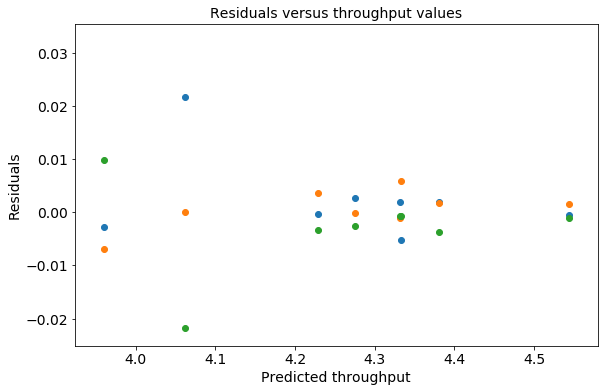

In [94]:
import numpy as np
import matplotlib.pyplot as plt

x1 = np.array([float(str1[4]), float(str2[4]), float(str3[4]), float(str4[4]), 
     float(str5[4]), float(str6[4]), float(str7[4]), float(str8[4])])
x2 = np.array([float(str1[5]), float(str2[5]), float(str3[5]), float(str4[5]), 
     float(str5[5]), float(str6[5]), float(str7[5]), float(str8[5])])
x3 = np.array([float(str1[6]), float(str2[6]), float(str3[6]), float(str4[6]), 
     float(str5[6]), float(str6[6]), float(str7[6]), float(str8[6])])

y = np.array([y0, y1, y2, y3, y4, y5, y6, y7])
print(y)
print(y.shape)
print(x1.shape)

# Plot
plt.figure(figsize=(8, 5))
plt.scatter(y, x1)
plt.scatter(y, x2)
plt.scatter(y, x3)
plt.title('Residuals versus throughput values')
plt.tight_layout(0)
plt.xlabel('Predicted throughput')
plt.ylabel('Residuals')
plt.savefig("multiplicative_residuals_throughput.pdf")

plt.show()

[-0.02175164 -0.00694419 -0.00515095 -0.00367671 -0.00331185 -0.00281292
 -0.00263388 -0.0011473  -0.00112863 -0.00073732 -0.00070813 -0.00046968
 -0.00035086 -0.00010378  0.0001081   0.00161698  0.00169858  0.00186596
  0.00197813  0.00273766  0.00366271  0.00585908  0.00975711  0.02164354]


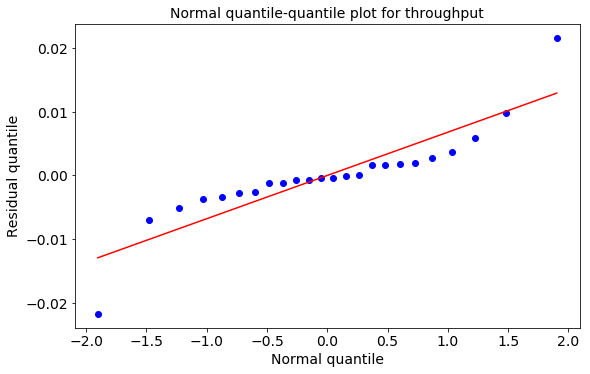

In [95]:
x = np.concatenate((x1, x2, x3), axis=None)
x = np.sort(x, axis=None)  
print(x)
import pylab 
import scipy.stats as stats

pylab.figure(figsize=(8, 5))
stats.probplot(x, dist="norm", plot=pylab)
pylab.title("Normal quantile-quantile plot for throughput")
pylab.xlabel("Normal quantile")
pylab.ylabel("Residual quantile")
pylab.tight_layout(0)
pylab.savefig("multiplicative_quantile_throughput.pdf")
pylab.show()